In [43]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import ast
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#OJO extra para que funcione algunos con mas de una neurona de salida
#from sklearn.multioutput import MultiOutputRegressor

In [44]:
ruta_platos_peruano = "dataset_para_modelo.xlsx"
dataset = pd.read_excel(ruta_platos_peruano)

lista_ingredientes_principales=['Yuca', 'Huevo', 'Pollo', 'Carne', 'Choclo', 'Lomo', 'Pescado', 'Cuy', 'Papa', 'Pasta', 'Camote', 'Papas Fritas', 'Camarones', 'Cerdo', 'Arroz', 'Langostinos', 'Mondongo', 'Frijoles', 'Carne Molida']

dataset = dataset.drop('F.D. List Result(Important Ingredient/Portion)', axis=1) 

dataset['F.D. List(Important Ingredient/Portion)'] = dataset['F.D. List(Important Ingredient/Portion)'].apply(ast.literal_eval)

In [45]:
array=[]
for i in range(0,dataset.shape[0]):
    arr=[]
    for j in range(0,len(lista_ingredientes_principales)):
        check=False
        for k in dataset['F.D. List(Important Ingredient/Portion)'][i]:
            if(lista_ingredientes_principales[j]==k[0]):
                arr.append(int(k[1]))
                check=True
                break
        if(check==False):
            arr.append(0)
    array.append(arr)
dataset['F.D. List(Portion)']=array

expanded_columns = pd.DataFrame(dataset["F.D. List(Portion)"].tolist(), columns=[f"Ingredient_{i+1}" for i in range(19)])
dataset = pd.concat([dataset, expanded_columns], axis=1)
dataset.drop("F.D. List(Portion)", axis=1, inplace=True)

In [46]:
#todo esta en gramos excepto el N° Food dish
columns_to_scale_X = [
    "P. Carbohydrates required",
    "P. Protein required",
    "P. Total fat required",
    "N° Food dish",
    "F.D. Portion (g)",
    "F.D. Carbohydrates (g)",
    "F.D. Protein (g)",
    "F.D. Total fat (g)",
    "Ingredient_1","Ingredient_2","Ingredient_3","Ingredient_4","Ingredient_5","Ingredient_6","Ingredient_7",
    "Ingredient_8","Ingredient_9","Ingredient_10","Ingredient_11","Ingredient_12","Ingredient_13",
    "Ingredient_14","Ingredient_15","Ingredient_16","Ingredient_17","Ingredient_18","Ingredient_19"
]

# Columna a escalar en Y
column_to_scale_Y = "Total imp. ingredients result (g)"

# Escalado de X
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(dataset[columns_to_scale_X])
X_scaled = pd.DataFrame(X_scaled, columns=columns_to_scale_X)
X_scaled = X_scaled.round(2)

# Escalado de Y
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(dataset[[column_to_scale_Y]])
Y_scaled = pd.DataFrame(Y_scaled, columns=[column_to_scale_Y])

In [48]:
#cambiar se piensa utilizar 250 y 50 otros para test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

In [49]:
MSE=[]
RMSE=[]
MAE=[]
R_2=[]

**Regresión con redes neuronales**

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Salida lineal para regresión
])

model.compile(optimizer='adam', loss='mean_squared_error', 
              metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=200, batch_size=16)

Epoch 1/200


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1637 - mean_squared_error: 0.1637   
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0318 - mean_squared_error: 0.0318 
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0103 - mean_squared_error: 0.0103 
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0052 - mean_squared_error: 0.0052 
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - mean_squared_error: 0.0033 
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - mean_squared_error: 0.0024 
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015 
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - mean_squared_error: 0.0014         
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - mean_squared_error: 0.0010 
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2478e-04 - mean_squared_error: 8.2478e-04 
Epoch 11/200
13/13 ━━━━━━━━━━━━━━

In [51]:
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')

# Calcular R²
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')

#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002721B7EB600> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MSE: 0.00012060939583911365
RMSE: 0.010982230913576424
MAE: 0.00710995242357515
R²: 0.9971516459225014


In [52]:
# Realizar predicción para un nuevo dato
#X_new = np.array([[80, 24, 56, 1, 614, 85.8, 42.8, 37, 0.0, 0.0, 0.0, 0.0, 0.0, 150, 0.0, 0.0, 0.0, 0.0, 0.0, 150, 0.0, 0.0, 150, 0.0, 0.0, 0.0, 0.0]])
#X_new_scaled = scaler_X.transform(X_new)
#y_pred_scaled_new = model.predict(X_new_scaled)
#y_pred_original_new = scaler_Y.inverse_transform(y_pred_scaled_new)
#
#print('Predicción para el nuevo dato (escalado):', y_pred_scaled_new)
#print('Predicción para el nuevo dato (original):', y_pred_original_new)

**Regresion Lineal**

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
#
y_pred_test = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 1.8331808963987192e-06
RMSE: 0.0013539501085338113
MAE: 0.0009887792251804684
R²: 0.999956706952682


**Regresion Ridge**

In [54]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
#
y_pred_test = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 0.0022838929866876795
RMSE: 0.04779009297634479
MAE: 0.03759629688660406
R²: 0.9460627768181504


**Regresión Lasso**

In [55]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
#
y_pred_test = lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 0.04252238718273869
RMSE: 0.2062095710260285
MAE: 0.16580393013100433
R²: -0.004223709722366298


**Elastic Net**

In [56]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
#
y_pred_test = elastic_net.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 0.04252238718273869
RMSE: 0.2062095710260285
MAE: 0.16580393013100433
R²: -0.004223709722366298


**Máquina de Soporte Vectorial (SVR)**

In [57]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
#
y_pred_test = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 0.005506225336949414
RMSE: 0.07420394421423576
MAE: 0.06533040955499977
R²: 0.8699630382773234


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Random Forest Regressor**

In [58]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
#
y_pred_test = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 0.0007616021338265914
RMSE: 0.027597139957368615
MAE: 0.013930567685589552
R²: 0.9820137350973024


**Gradient Boosting Regressor**

In [59]:
gb_reg = GradientBoostingRegressor(n_estimators=100)
gb_reg.fit(X_train, y_train)
#
y_pred_test = gb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 0.0002260199627612305
RMSE: 0.0150339603152739
MAE: 0.01083151414263931
R²: 0.9946622327551843


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Exportar el modelo y su scaler

In [60]:
# Guardar el modelo
#model.save('modelos/dietasist_model2.h5')
#
## Guardar los scalers
#joblib.dump(scaler_X, 'modelos/scaler_2_X.pkl')
#joblib.dump(scaler_Y, 'modelos/scaler_2_Y.pkl')

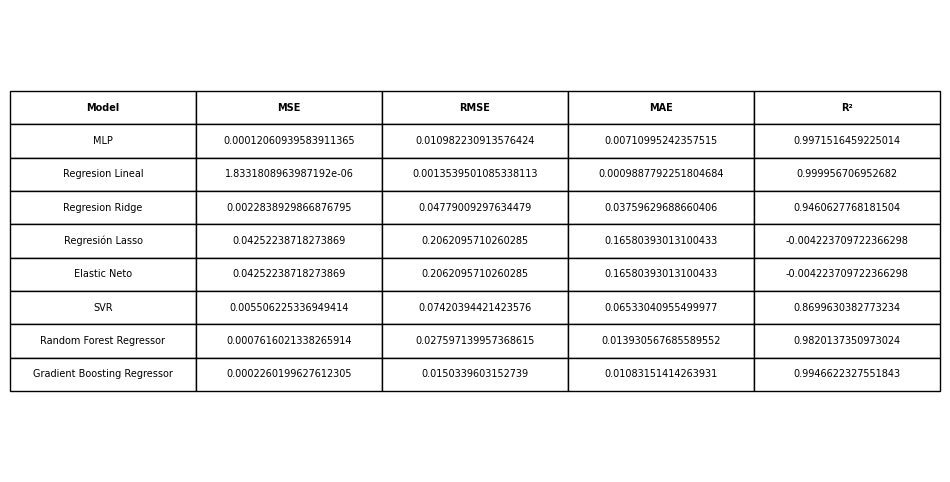

In [61]:
#MSE = [round(val, 10) for val in MSE]
#RMSE = [round(val, 10) for val in RMSE]
#MAE = [round(val, 102) for val in MAE]
#R_2 = [round(val, 10) for val in R_2]

data = {
    'Model': ['MLP', 'Regresion Lineal', 'Regresion Ridge', 'Regresión Lasso', 'Elastic Neto', 'SVR', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MSE': [MSE[0], MSE[1], MSE[2], MSE[3],MSE[4], MSE[5], MSE[6], MSE[7]],
    'RMSE': [RMSE[0], RMSE[1], RMSE[2], RMSE[3],RMSE[4], RMSE[5], RMSE[6], RMSE[7]],
    'MAE': [MAE[0], MAE[1], MAE[2], MAE[3],MAE[4], MAE[5], MAE[6], MAE[7]],
    'R²': [R_2[0], R_2[1], R_2[2], R_2[3],R_2[4], R_2[5], R_2[6], R_2[7]],
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear figura y ejes con tamaño más grande
fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño de la figura según sea necesario

# Ocultar cuadrícula
ax.axis('tight')
ax.axis('off')

# Crear tabla
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Ajustar tamaño de la tabla
table.scale(1, 2)

# Hacer la primera fila (cabecera) en negrita
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold')

# Mostrar tabla
plt.show()